In [1]:
import csv, ccxt, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_data(filename,title, column, symbol):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename)

    # Plot the new column as a line plot
    plt.figure(figsize=(6, 3))
    plt.plot(df[column], label=symbol)
    plt.xlabel('Days')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

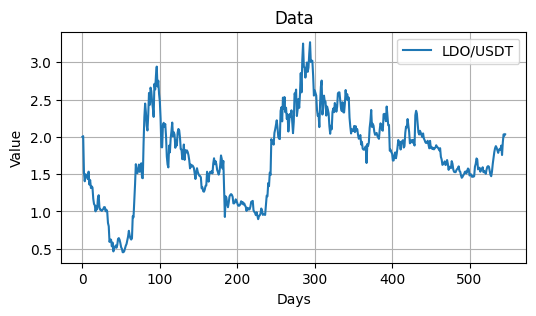

mean : +4.75%

quantile 25% : +1.46%
median : +3.09%
quantile 75% : +6.24%

RESULTS : 
   Minimum distance : 0.04
   Maximum distance : 0.08


In [3]:
CSV_path = "data.csv"
with open(CSV_path, mode='r') as file:

    # Create a reader object
    reader = csv.reader(file)

    # Read the first (and only) row of the CSV file
    row = next(reader)

    # Convert the row values to floats
    data_csv = [value for value in row]

symbol = data_csv[14]
exchange = ccxt.binance()
filename = "initial_data.csv"
with open(filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Open", "High", "Low", "Close"])  # Write header row
    ohlcv = exchange.fetch_ohlcv(symbol, '1d', limit=1000)
    for i in range(len(ohlcv)): writer.writerow([ohlcv[i][1], ohlcv[i][2], ohlcv[i][3], ohlcv[i][4]])
plot_data(filename,"Data",'Close',symbol)


# Load the CSV file with 4 columns
input_file = filename
output_file = 'returns.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(input_file)

# Create a new list to store the calculated values
new_column_values = []

# Iterate through the DataFrame rows
for index, row in df.iterrows():
    # Calculate the new values and append them to the list
    new_column_values.extend([abs(row.iloc[3]/row.iloc[0]-1)*100])

# Create a new DataFrame with the calculated values as a single column
new_df = pd.DataFrame({'New_Column': new_column_values})

# Save the new DataFrame to a CSV file
new_df.to_csv(output_file, index=False)

# Load the CSV file with 4 columns
input_file = output_file

# Read the CSV file into a DataFrame
df = pd.read_csv(input_file)

# Create a new list to store the calculated values
new_column_values = []
sum = 0
count = 0

# Iterate through the DataFrame rows
for index, row in df.iterrows():
    new_column_values.append(row.iloc[0])

print(f"mean : +{int(100*(np.mean(new_column_values)))/100}%",end='\n\n')
print(f"quantile 25% : +{int(100*(np.quantile(new_column_values,.25)))/100}%")
print(f"median : +{int(100*(np.median(new_column_values)))/100}%")
print(f"quantile 75% : +{int(100*(np.quantile(new_column_values,.75)))/100}%")

claw_dist = int(100*(np.mean(new_column_values)))/100

if claw_dist < 2:
    min_claw_dist = 2
else:
    min_claw_dist = claw_dist

max_claw_dist = int(min_claw_dist*1.75)/100
min_claw_dist = int(min_claw_dist)/100

print(f"\nRESULTS : ")
print(f"   Minimum distance : {min_claw_dist}\n   Maximum distance : {max_claw_dist}")

In [4]:
# WRITE CSV
CSV_path = "data.csv"
with open(CSV_path, mode='r') as file:

    # Create a reader object
    reader = csv.reader(file)

    # Read the first (and only) row of the CSV file
    row = next(reader)

    # Convert the row values to floats
    data_csv = [value for value in row]

data_csv[12] = min_claw_dist
data_csv[13] = max_claw_dist

with open(CSV_path, mode='w', newline='') as file:

    # Create a writer object
    writer = csv.writer(file)

    # Write the values to the CSV file
    writer.writerow(data_csv)

In [5]:
os.remove("initial_data.csv")
os.remove("returns.csv")
print("Useless files erased")

Useless files erased


In [1]:
%%file parameters_computer.py
import csv, ccxt, os, sys
import numpy as np
import pandas as pd

CSV_path = "data.csv"

try:
    with open(CSV_path, mode='r') as file:
        pass
except OSError:
    print("Could not open/read file:", CSV_path)
    sys.exit()

with open(CSV_path, mode='r') as file:
    reader = csv.reader(file)
    row = next(reader)
    data_csv = [value for value in row]

symbol = data_csv[14]
exchange = ccxt.binance()
filename = "initial_data.csv"
with open(filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Open", "High", "Low", "Close"])  # Write header row
    ohlcv = exchange.fetch_ohlcv(symbol, '1d', limit=1000)
    for i in range(len(ohlcv)): writer.writerow([ohlcv[i][1], ohlcv[i][2], ohlcv[i][3], ohlcv[i][4]])


# Load the CSV file with 4 columns
input_file = filename
output_file = 'returns.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(input_file)

# Create a new list to store the calculated values
new_column_values = []

# Iterate through the DataFrame rows
for index, row in df.iterrows(): new_column_values.extend([abs(row.iloc[3]/row.iloc[0]-1)*100])

# Create a new DataFrame with the calculated values as a single column
new_df = pd.DataFrame({'New_Column': new_column_values})

# Save the new DataFrame to a CSV file
new_df.to_csv(output_file, index=False)

# Load the CSV file with 4 columns
input_file = output_file

# Read the CSV file into a DataFrame
df = pd.read_csv(input_file)

# Create a new list to store the calculated values
new_column_values = []
sum = 0
count = 0

# Iterate through the DataFrame rows
for index, row in df.iterrows(): new_column_values.append(row.iloc[0])

claw_dist = int(100*(np.mean(new_column_values)))/100

if claw_dist < 2: min_claw_dist = 2
else: min_claw_dist = claw_dist

max_claw_dist = int(min_claw_dist*1.75)/100
min_claw_dist = int(min_claw_dist)/100

data_csv[12] = min_claw_dist
data_csv[13] = max_claw_dist

try:
    with open(CSV_path, mode='w') as file:
        pass
except OSError:
    print("Could not write file:", CSV_path)
    sys.exit()

with open(CSV_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(data_csv)

os.remove("initial_data.csv")
os.remove("returns.csv")

Writing parameters_computer.py


In [7]:
%%bash
python3 parameters_computer.py